<a href="https://colab.research.google.com/github/andrew-voortman/ML_Loan_Prediction_Model/blob/main/Test_Loan_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline


In [2]:
# For creating models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
from google.colab import drive
drive.mount('/content/drive')
#train_df = pd.read_csv('/content/drive/My Drive/ML_Loan_Prediction_Model/Resources/train_u6lujuX_CVtuZ9i.csv')
#test_df = pd.read_csv('/content/drive/My Drive/ML_Loan_Prediction_Model/Resources/test_Y3wMUE5_7gLdaTN.csv')
preprocessing_df = pd.read_csv('/content/drive/My Drive/ML_Loan_Prediction_Model/Resources/preprocessed_train_data.csv')
preprocessing_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,Y,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,N,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,Y,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,1


In [4]:
# Encode target variable
def loan_status(loan):
    if loan == "Y":
        return 1
    else:
        return 0

# Call the encode_edu function on the Education column
preprocessing_df["Loan_Status"] = preprocessing_df["Loan_Status"].apply(loan_status)

# Review the DataFrame
preprocessing_df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [5]:
# MODIFICATION
# Drop Gender Column
# preprocessing_df.drop('Gender', axis=1, inplace=True)
# preprocessing_df.head()

In [6]:
# Split our preprocessed data into our features and target arrays
X = preprocessing_df.drop("Loan_Status", axis=1)
y = preprocessing_df["Loan_Status"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1=25
hidden_nodes_layer2=5
hidden_nodes_layer3=1

nn = tf.keras.models.Sequential()



In [9]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='elu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='elu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='elu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                400       
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 538 (2.10 KB)
Trainable params: 538 (2.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.7260 - accuracy: 0.5424
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.6004
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6607
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.7031
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7232
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.7567
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7902
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.7946
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.8103
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.8170
Epoch 11/

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.6361 - accuracy: 0.7733 - 121ms/epoch - 24ms/step
Loss: 0.636124312877655, Accuracy: 0.7733333110809326


In [13]:
# Export our model to HDF5 file
nn.save('/content/drive/MyDrive/project4/Output/ModelTest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Creating Logistic Regression Model
lr_model = LogisticRegression()

In [15]:
# Train the model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = lr_model.predict(X_test)


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.45        46
           1       0.76      0.95      0.85       104

    accuracy                           0.76       150
   macro avg       0.76      0.64      0.65       150
weighted avg       0.76      0.76      0.73       150



In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [19]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19,27
Actual 1,5,99


Accuracy Score : 0.7866666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.41      0.54        46
           1       0.79      0.95      0.86       104

    accuracy                           0.79       150
   macro avg       0.79      0.68      0.70       150
weighted avg       0.79      0.79      0.76       150



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2803249767505989, 'Credit_History'),
 (0.23905540020406466, 'Total_Income'),
 (0.21335724066716957, 'LoanAmount'),
 (0.03779702789911742, 'Loan_Amount_Term'),
 (0.029380119275569286, 'Education'),
 (0.026660356347073613, 'Married'),
 (0.025330480889761406, 'Gender'),
 (0.024752128251514977, 'Self_Employed'),
 (0.02237808560146166, 'Property_Area_Semiurban'),
 (0.01934916026573278, 'Property_Area_Rural'),
 (0.018050541100970593, 'Dependents_0'),
 (0.017938099910667672, 'Dependents_1'),
 (0.016462685631487076, 'Dependents_3+'),
 (0.015318037604680878, 'Property_Area_Urban'),
 (0.013845659600129501, 'Dependents_2')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

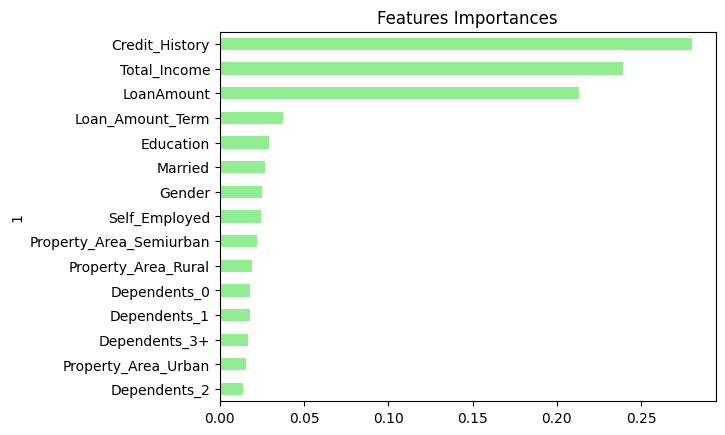

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [25]:
treemodel = DecisionTreeClassifier()
treemodel = treemodel.fit(X_train_scaled, y_train)

In [48]:
# Making predictions using the testing data
predictions = treemodel.predict(X_test_scaled)

In [49]:
predictions[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [50]:
predictions = pd.DataFrame(predictions)
predict_df_tree = pd.concat([preprocessing_df,predictions], axis=1)
predict_df_tree

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,0
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1,1.0
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0,0.0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1,1.0
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1,1.0
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0,1,0,2900.0,71.0,360.0,1.0,1,1,0,0,0,1,0,0,NaN
594,0,1,1,0,4106.0,40.0,180.0,1.0,1,0,0,0,1,1,0,0,NaN
595,0,1,1,0,8312.0,253.0,360.0,1.0,1,0,1,0,0,0,0,1,NaN
596,0,1,1,0,7583.0,187.0,360.0,1.0,1,0,0,1,0,0,0,1,NaN


In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,24,22
Actual 1,18,86


Accuracy Score : 0.7333333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.52      0.55        46
           1       0.80      0.83      0.81       104

    accuracy                           0.73       150
   macro avg       0.68      0.67      0.68       150
weighted avg       0.73      0.73      0.73       150



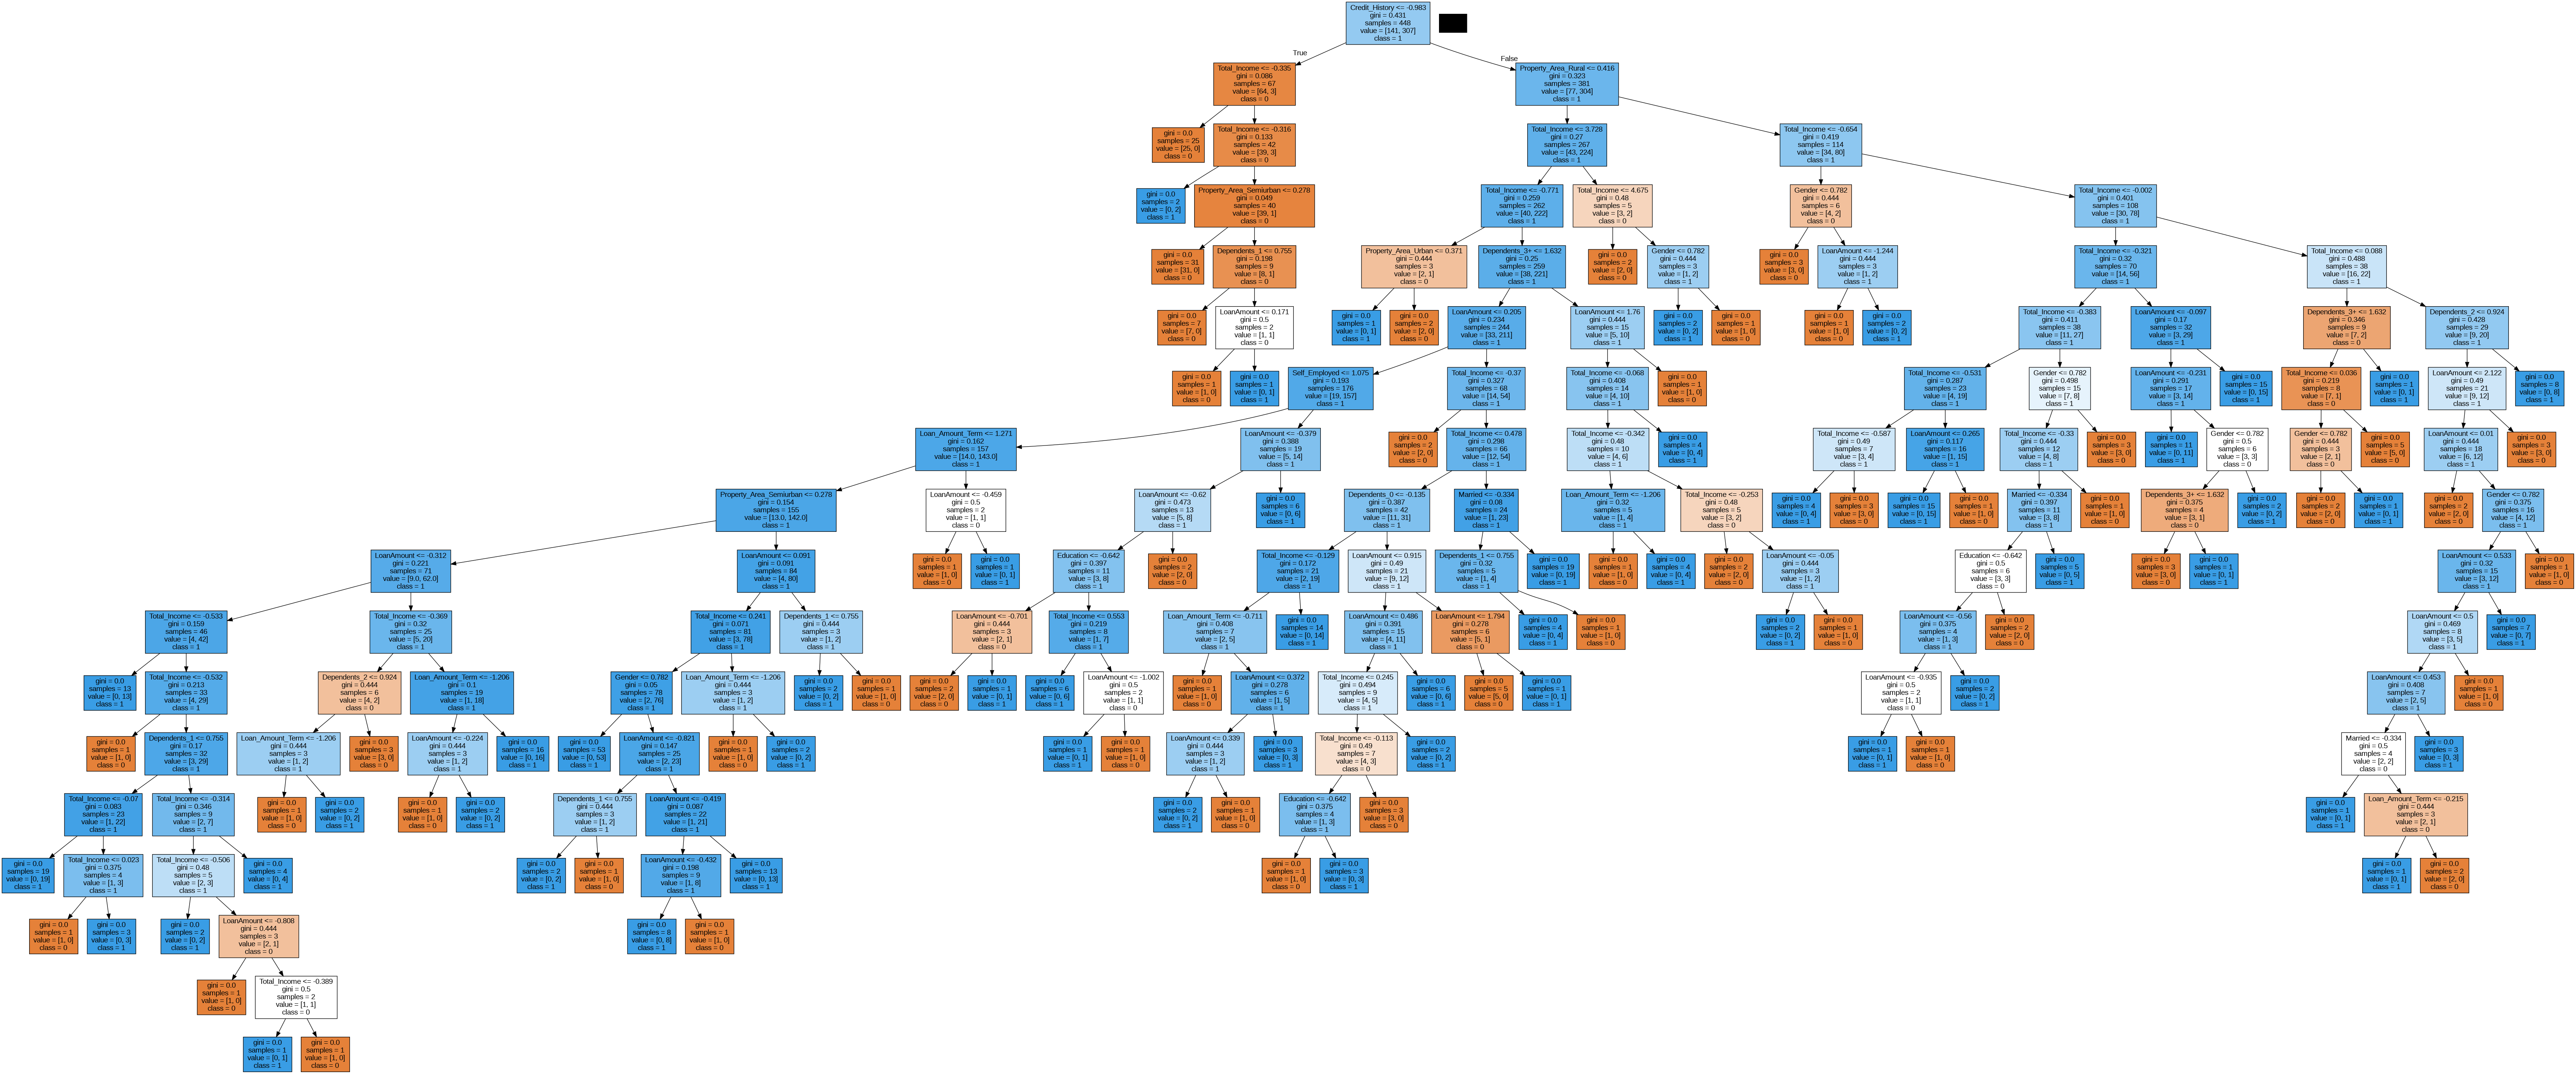

In [28]:
import pydotplus
from IPython.display import Image
from sklearn import tree

# Create DOT data
dot_data = tree.export_graphviz(
    treemodel, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [29]:
!pip install keras_tuner

In [36]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','elu'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=5), activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [37]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [38]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [39]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'elu', 'first_units': 16, 'num_layers': 4, 'units_0': 16, 'units_1': 26, 'units_2': 26, 'units_3': 21, 'units_4': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 26, 'num_layers': 4, 'units_0': 11, 'units_1': 21, 'units_2': 21, 'units_3': 16, 'units_4': 11, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 21, 'num_layers': 3, 'units_0': 11, 'units_1': 26, 'units_2': 11, 'units_3': 26, 'units_4': 26, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0015'}


In [40]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.5630 - accuracy: 0.7867 - 162ms/epoch - 32ms/step
Loss: 0.562978208065033, Accuracy: 0.7866666913032532
5/5 - 0s - loss: 0.5607 - accuracy: 0.7800 - 176ms/epoch - 35ms/step
Loss: 0.5606591701507568, Accuracy: 0.7799999713897705
5/5 - 0s - loss: 0.5504 - accuracy: 0.7800 - 169ms/epoch - 34ms/step
Loss: 0.5504381656646729, Accuracy: 0.7799999713897705


In [41]:
# Get  best model hyperparameters
hyper = tuner.get_best_hyperparameters(1)[0]
hyper.values

{'activation': 'elu',
 'first_units': 16,
 'num_layers': 4,
 'units_0': 16,
 'units_1': 26,
 'units_2': 26,
 'units_3': 21,
 'units_4': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}